In [1]:
from mss import mss
import pydirectinput 
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import time
from gym import Env
from gym.spaces import Box, Discrete

In [2]:
class dino(Env):
    def __init__(self):
        super().__init__()
        
        self.observation_space=Box(low=0,high=255,shape=(1,83,100),dtype=np.uint8)
        self.action_space=Discrete(3)
        
        self.cap=mss()
        self.game_location = {'top': 300, 'left': 0, 'width': 600, 'height': 500}
        self.done_location = {'top': 370, 'left': 630, 'width': 660, 'height': 70}
        
    def step(self, action):
        action_map={
            0:'space',
            1:'down',
            2:'no_op'
        }
        
        if action !=2:
            pydirectinput.press(action_map[action])
        
        done, done_cap=self.get_done()
        new_observation=self.get_observation()
        
        reward=1
        info={}
        
        return new_observation, reward, done, info
    
    def reset(self):
        time.sleep(1)
        pydirectinput.click(x=150,y=150)
        pydirectinput.press('space')
        return self.get_observation()
        
    def render(self):
        cv2.imshow('game',np.array(self.cap.grab(self.game_location))[:,:,:3])
        if cv2.waitKey(1) & 0xFF==ord('q'):
                   self.close()
    def close(self):
        cv2.destroyAllWindows()
        
    def get_observation(self):
        raw=np.array(self.cap.grab(self.game_location))[:,:,:3]
        gray=cv2.cvtColor(raw,cv2.COLOR_BGR2GRAY)
        resized=cv2.resize(gray,(100,83))
        channel=np.reshape(resized,(1,83,100))
        
        return channel
    def get_done(self):
        done_cap=np.array(self.cap.grab(self.done_location))[:,:,:3]
        done_strings=['GAME','GAHE']
        
        done=False
        res=pytesseract.image_to_string(done_cap)[:4]
        if res in done_strings:
            done=True
        return done, done_cap

In [3]:
env=dino()

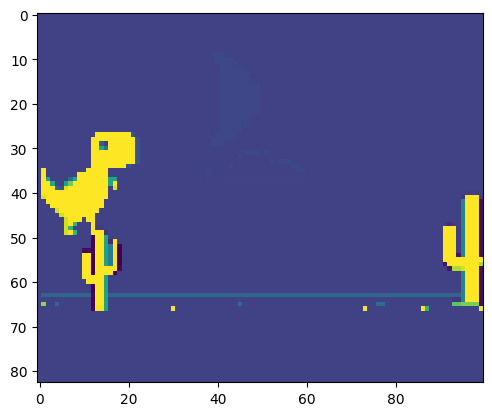

In [4]:
plt.imshow(env.get_observation()[0])

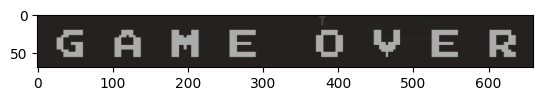

In [5]:
done, done_cap = env.get_done()
plt.imshow(done_cap)

In [6]:
done

True

In [7]:
env.reset()

array([[[33, 33, 33, ..., 33, 33, 33],
        [33, 33, 33, ..., 33, 33, 33],
        [33, 33, 33, ..., 33, 33, 33],
        ...,
        [33, 33, 33, ..., 33, 33, 33],
        [33, 33, 33, ..., 33, 33, 33],
        [33, 33, 33, ..., 33, 33, 33]]], dtype=uint8)

In [8]:
ep=5
for epi in range(1,ep+1):
    obs=env.reset()
    done=False
    total_reward=0
    
    while not done:
        obs, reward, done, info=env.step(env.action_space.sample())
        total_reward+=reward
    print(f'Episode:{epi}   Reward:{total_reward}')

Episode:1   Reward:18
Episode:2   Reward:11
Episode:3   Reward:11
Episode:4   Reward:13
Episode:5   Reward:12


In [8]:
import os 

from stable_baselines3.common import env_checker
from stable_baselines3 import DQN

In [9]:
env_checker.check_env(env)

In [10]:
model = DQN('CnnPolicy', env, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


C:\Users\vibhu\OneDrive\Documents\env\lib\site-packages\stable_baselines3\common\buffers.py:229: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 16.62GB > 11.07GB
  warnings.warn(


In [11]:
model.learn(total_timesteps=100)

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11       |
|    ep_rew_mean      | 11       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1        |
|    time_elapsed     | 29       |
|    total_timesteps  | 44       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 12.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1        |
|    time_elapsed     | 60       |
|    total_timesteps  | 97       |
----------------------------------


In [14]:
for episode in range(5): 
    obs = env.reset()
    done = False
    total_reward = 0
    while not done: 
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(int(action))
        time.sleep(0.01)
        total_reward += reward
    print('Total Reward for episode {} is {}'.format(episode, total_reward))
    time.sleep(2)

Total Reward for episode 0 is 9
Total Reward for episode 1 is 9
Total Reward for episode 2 is 9
Total Reward for episode 3 is 9
Total Reward for episode 4 is 9
